In [1]:
import sys
sys.path.insert(0,'./pyproclus')

In [2]:
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
import proclus as prc
import plotter
import arffreader as ar
import numpy as np
import adjrand

In [4]:
from sklearn.cluster import KMeans

In [5]:
data = load_boston()
data.keys()

['filename', 'data', 'target', 'DESCR', 'feature_names']

In [6]:
X = pd.DataFrame(data['data'], columns = data['feature_names'])
Y = data['target'].reshape((data.target.shape[0], 1))
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [7]:
Y = pd.DataFrame(Y)

In [8]:
Y.describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [9]:
y_synthetic = np.zeros(Y.shape)
y_synthetic.shape

(506, 1)

In [10]:
y_synthetic = np.where(Y<=17, y_synthetic, 1)
y_synthetic = np.where(Y<=21, y_synthetic, 2)
y_synthetic = np.where(Y<=25, y_synthetic, 3)

In [11]:
np.unique(y_synthetic, return_counts=True)

(array([0., 1., 2., 3.]), array([127, 122, 133, 124]))

In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

In [13]:
tsne = TSNE(n_components=2, perplexity = 50)
            #n_iter=5000, method = 'exact')

tsne_result = tsne.fit_transform(X_minmax)

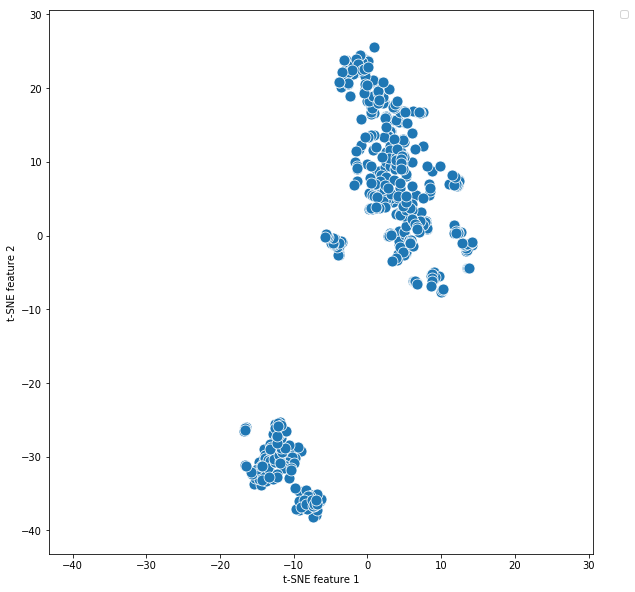

In [14]:
tsne_result_df = pd.DataFrame({'t-SNE feature 1': tsne_result[:,0], 't-SNE feature 2': tsne_result[:,1]})
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x='t-SNE feature 1', y='t-SNE feature 2', data=tsne_result_df, 
                ax=ax,s=120, palette = sns.color_palette("hls", 1))
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [21]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(tsne_result)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

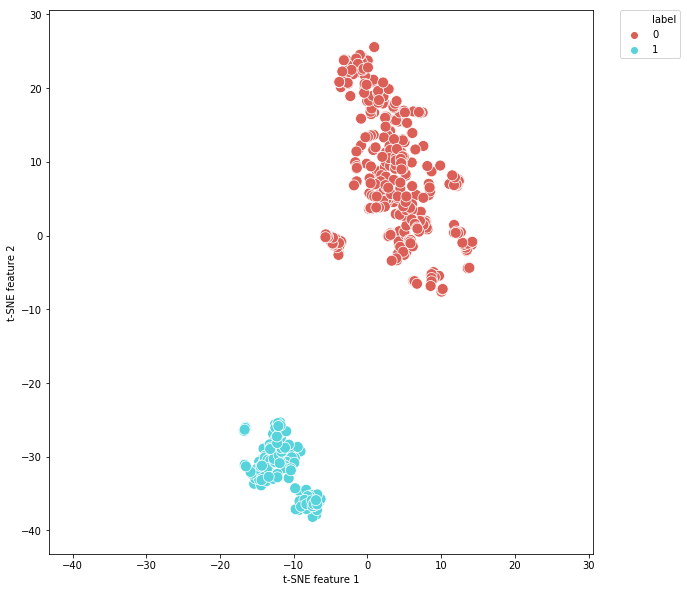

In [22]:
tsne_result_df = pd.DataFrame({'t-SNE feature 1': tsne_result[:,0], 't-SNE feature 2': tsne_result[:,1],
                              'label': kmeans.labels_})
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x='t-SNE feature 1', y='t-SNE feature 2', hue='label', data=tsne_result_df, 
                ax=ax,s=120, palette = sns.color_palette("hls", 2))
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

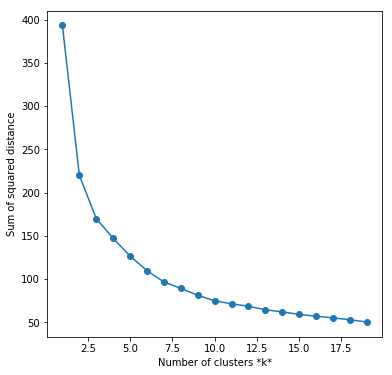

In [35]:
#sse = []
#list_k = list(range(1, 20))

#for k in list_k:
#    km = KMeans(n_clusters=k)
#    km.fit(X_minmax)
#    sse.append(km.inertia_)

# Plot sse against k
#plt.figure(figsize=(6, 6))
#plt.plot(list_k, sse, '-o')
#plt.xlabel(r'Number of clusters *k*')
#plt.ylabel('Sum of squared distance');

In [23]:
y = kmeans.labels_.copy()
y = y.astype('int64')

In [27]:
R = 1 # toggle run proclus
RS = 0 # toggle use random seed

if R: # run proclus
    rseed = 324853#1010954
    #991513 5 5 40 12
    #494346 4 5 40 12
    #932969 4 5 40 12
    #324853 4 5 40 12
    if RS:
        rseed = np.random.randint(low = 0, high = 1239831)

    print "Using seed %d" % rseed

    M, D, A = prc.proclus(X_minmax, k = 4, l = 5, seed = rseed, A = 40, B = 12)
    print "Accuracy: %.4f" % prc.computeBasicAccuracy(A, y)
    adj = adjrand.computeAdjustedRandIndex(A, y)
    print "Adjusted rand index: %.4f" % adj

Using seed 324853
bad medoids:
[64]
old mcurr:
[ 64 414 212 246]
new mcurr:
[212 246 414 484]
finished iter: 1
bad medoids:
[484]
old mcurr:
[212 246 414 484]
new mcurr:
[212 246 414 415]
finished iter: 2
bad medoids:
[414]
old mcurr:
[212 246 414 415]
new mcurr:
[212 246 356 415]
finished iter: 3
finished iter: 4
finished iterative phase...
Accuracy: 0.9980
Adjusted rand index: 0.4641


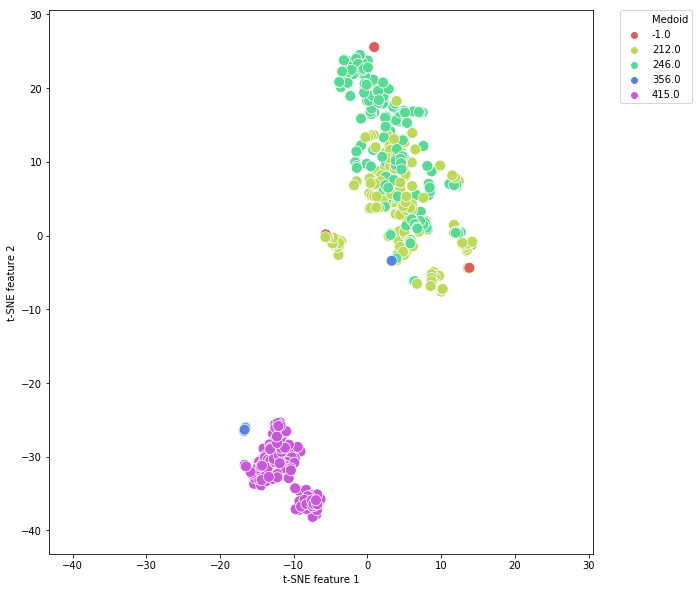

In [32]:
tsne_result_df = pd.DataFrame({'t-SNE feature 1': tsne_result[:,0], 't-SNE feature 2': tsne_result[:,1],
                              'Medoid': A})
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x='t-SNE feature 1', y='t-SNE feature 2', hue='Medoid', data=tsne_result_df, 
                ax=ax,s=120, palette = sns.color_palette("hls", 5))
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [28]:
np.unique(A, return_counts=True)

(array([ -1., 212., 246., 356., 415.]), array([  5, 174, 194,   9, 124]))

In [33]:
from sklearn.metrics.cluster import completeness_score

In [36]:
completeness_score(y, A)

0.47450060226850344

In [344]:
for i in range (len (D)):
    D[i] = sorted(D[i])
D

[[0, 1, 3, 8, 11],
 [0, 1, 6, 7, 8, 11],
 [0, 2, 3, 4],
 [0, 3, 4, 11, 12],
 [1, 2, 8, 9, 10]]

In [220]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [253]:
for i in range(len(D)):
    for j in range(i+1, len(D)):
        print i, j, len(set(D[i]).intersection(D[j]))

0 1 3
0 2 1
0 3 2
1 2 0
1 3 1
2 3 3


In [254]:
for i in range(len(D)):
    for j in range(i+1, len(D)):
        print i, j, len(set(D[i]).union(D[j]))

0 1 6
0 2 9
0 3 7
1 2 11
1 3 9
2 3 8


In [364]:
cluster_1 = 4
cluster_2 = 1
columns_i = sorted(D[cluster_1])
x_i = X.iloc[:, columns_i]
x_i['y'] = np.zeros((x_i.shape[0], 1), dtype = int)
x_i.iloc[np.where(A == M[cluster_1])[0],-1] = 1
x_i.iloc[np.where(A == M[cluster_2])[0],-1] = 2
data = x_i[x_i['y']!=0]
data.reset_index(inplace = True, drop = True)

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [365]:
fig = px.parallel_coordinates(data, color="y",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=1.5)
fig.show()

In [335]:
columns_i = sorted(list(set(D[cluster_1]).intersection(set(D[cluster_2]))))
x_i = X.iloc[:, columns_i]
x_i['y'] = np.zeros((x_i.shape[0], 1), dtype = int)
x_i.iloc[np.where(A == M[cluster_1])[0],-1] = 1
x_i.iloc[np.where(A == M[cluster_2])[0],-1] = 2
data = x_i[x_i['y']!=0]
data.reset_index(inplace = True, drop = True)

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/animeshdeb30/.local/lib/python2.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/animeshdeb30/ana

In [336]:
fig = px.parallel_coordinates(data, color="y",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=1.5)
fig.show()

In [275]:
x_i.columns

Index([u'attr1', u'attr2', u'attr3', u'attr4', u'y'], dtype='object')

In [276]:
columns_i = list(set(D[cluster_1]).intersection(set(D[cluster_2])))
x_i = x.iloc[:, columns_i]
x_i['y'] = np.zeros((x_i.shape[0], 1), dtype = int)
x_i.iloc[np.where(A == M[cluster_1])[0],-1] = 6
x_i.iloc[np.where(A == M[cluster_2])[0],-1] = 7
data = x_i[x_i['y']!=0]
data.reset_index(inplace = True, drop = True)

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [277]:
for i in data.columns:
    print(i)

FAMILY PLANNING PRACTICES (CMW AGED 15-49 YEARS) - Current Usage - Male Sterilization (%) - Total
ACUTE ILLNESS - Persons suffering from Acute Illness and taking treatment from Any Source (%) - Female - Total
ACUTE ILLNESS - Persons suffering from Acute Illness and taking treatment from Any Source (%) - Person - Total
ACUTE ILLNESS - Persons suffering from Acute Illness and taking treatment from Any Source (%) - Male - Total
y


In [278]:
column = []
for i in range(1, len(data.columns)):
    column.append('attr'+str(i))
column.append('y')
data.set_axis(column, axis='columns', inplace=True)
data

,attr1,attr2,attr3,attr4,y
0,0.00,95.50,95.80,96.10,7
1,0.30,93.30,94.40,95.50,7
2,0.20,94.10,94.50,94.90,7
3,0.00,95.60,96.50,97.40,7
4,0.40,94.40,95.00,95.80,7
5,0.30,96.40,96.50,96.70,7
6,0.30,93.10,93.70,94.40,7
7,0.20,99.30,99.40,99.40,6
8,0.30,95.90,96.20,96.60,6
9,0.40,96.80,97.00,97.20,6


In [279]:
fig = px.parallel_coordinates(data, color="y",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=6.5)

fig.show()

In [226]:
data.shape

(28, 12)

In [159]:
list(x_i.columns)

['CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Diabetes - Male - Total',
 'INJURY - Number of Injured Persons by type of Treatment received (Per 100,000 Population) - Major - Male - Total',
 'CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Hypertension - Male - Total',
 'CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Hypertension - Female - Total',
 'CHILDHOOD DISEASES - Children suffering from Fever who sought treatment (%) - Total',
 'FAMILY PLANNING PRACTICES (CMW AGED 15-49 YEARS) - Current Usage - Male Sterilization (%) - Total',
 'FAMILY PLANNING PRACTICES (CMW AGED 15-49 YEARS) - Current Usage - Pills (%) - Total',
 'ACUTE ILLNESS - Persons suffering from Acute Illness and taking treatment from Any Source (%) - Person - Total',
 'ACUTE ILLNESS - Persons suffering from Acute Illness and taking treatment from Any Source (%) - Male - Total',
 'ACUTE ILLNESS - Persons suffering 

In [280]:
columns_i = list(set(D[cluster_1]).union(set(D[cluster_2])))
x_i = x.iloc[:, columns_i]
x_i['y'] = np.zeros((x_i.shape[0], 1), dtype = int)
x_i.iloc[np.where(A == M[cluster_1])[0],-1] = 1
x_i.iloc[np.where(A == M[cluster_2])[0],-1] = 2
fig = px.parallel_coordinates(x_i, color="y",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=1)
fig.show()

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [147]:
columns_i = list(set(D[cluster_1]).union(set(D[cluster_2])))
x_i = X.iloc[:, columns_i]
x_i['y'] = np.zeros((x_i.shape[0], 1), dtype = int)
x_i.iloc[np.where(A == M[cluster_1])[0],-1] = 1
x_i.iloc[np.where(A == M[cluster_2])[0],-1] = 2
data = x_i[x_i['y']!=0]
data.reset_index(inplace = True, drop = True)

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [282]:
for i in data.columns:
    print(i)

CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Hypertension - Person - Total
CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Hypertension - Female - Total
CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Asthma / Chronic Respiratory Disease - Person - Total
CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Asthma / Chronic Respiratory Disease - Female - Total
IMMUNIZATION, VITAMIN A & IRON SUPPLEMENT AND BIRTH WEIGHT - Children aged 12-23 months who have received BCG (%) - Total
ACUTE ILLNESS - Persons suffering from Acute Illness and taking treatment from Government Source (%) - Male - Total
IMMUNIZATION, VITAMIN A & IRON SUPPLEMENT AND BIRTH WEIGHT - Children who did not receive any vaccination (%) - Total
INJURY - Number of Injured Persons by type of Treatment received (Per 100,000 Population) - Severe - Female - Total
CHILDHOOD DISEASES - Children su

In [283]:
column = []
for i in range(1, len(data.columns)):
    column.append('attr'+str(i))
column.append('y')
data.set_axis(column, axis='columns', inplace=True)
data

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,y
0,2336.00,2063.00,466.00,344.00,94.30,50.10,3.40,33.00,90.70,634.00,...,652.00,0.00,0.00,95.80,96.10,95.50,47.30,89.90,44.50,2
1,1833.00,2124.00,539.00,378.00,93.20,54.40,5.30,24.00,93.50,455.00,...,474.00,0.30,0.00,94.40,95.50,93.30,54.30,94.60,54.10,2
2,3190.00,3203.00,232.00,197.00,97.80,44.30,1.30,88.00,95.90,529.00,...,590.00,0.20,0.00,94.50,94.90,94.10,44.10,65.10,43.90,2
3,1362.00,1186.00,283.00,303.00,96.20,54.00,2.50,12.00,93.90,3225.00,...,3307.00,0.00,0.00,96.50,97.40,95.60,53.80,95.50,53.50,2
4,2252.00,2552.00,511.00,472.00,98.10,62.10,1.60,171.00,85.90,362.00,...,367.00,0.40,0.10,95.00,95.80,94.40,55.10,82.20,48.90,2
5,3634.00,4271.00,625.00,484.00,98.00,64.10,1.60,146.00,90.90,664.00,...,642.00,0.30,0.00,96.50,96.70,96.40,62.60,49.60,61.40,2
6,2528.00,2794.00,402.00,376.00,95.80,39.50,2.50,57.00,79.40,445.00,...,463.00,0.30,0.00,93.70,94.40,93.10,39.00,75.60,38.60,2
7,514.00,598.00,886.00,910.00,91.30,2.50,5.20,37.00,99.30,4584.00,...,4533.00,0.20,0.00,99.40,99.40,99.30,2.60,96.50,2.60,1
8,1324.00,1613.00,707.00,658.00,96.70,3.40,1.90,504.00,98.00,1469.00,...,1230.00,0.30,0.00,96.20,96.60,95.90,3.90,99.20,4.40,1
9,1055.00,1096.00,3879.00,3852.00,96.90,7.50,1.60,666.00,98.20,4709.00,...,4905.00,0.40,0.00,97.00,97.20,96.80,7.20,99.00,6.80,1


In [148]:
fig = px.parallel_coordinates(data, color="y",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=1.5)
fig.show()

In [205]:
for i in x.columns:
    if 'male' in i.lower():
        print(i)

EFFECTIVE LITERACY RATE - Male - Total
EFFECTIVE LITERACY RATE - Female - Total
MARRIAGE - Marriages among Females below legal age (18 years) (%)# - Total
MARRIAGE - Marriages among Males below legal age (21 years) (%)# - Total
MARRIAGE - Mean age at Marriage# - Male - Total
MARRIAGE - Mean age at Marriage# - Female - Total
SCHOOLING STATUS - Children currently attending school (Age 6-17 years) (%) - Male - Total
SCHOOLING STATUS - Children currently attending school (Age 6-17 years) (%) - Female - Total
SCHOOLING STATUS - Children attended before / Drop out (Age 6-17 years) (%) - Male - Total
SCHOOLING STATUS - Children attended before / Drop out (Age 6-17 years) (%) - Female - Total
WORK STATUS - Children aged 5-14 years engaged in work (%) - Male - Total
WORK STATUS - Children aged 5-14 years engaged in work (%) - Female - Total
WORK STATUS - Work Participation Rate (15 years and above) - Male - Total
WORK STATUS - Work Participation Rate (15 years and above) - Female - Total
DISABI

In [164]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [165]:
X_new = SelectKBest(chi2, k=10).fit_transform(data.iloc[:,:-1], data.iloc[:,-1])

In [137]:
help(SelectKBest)

Help on class SelectKBest in module sklearn.feature_selection.univariate_selection:

class SelectKBest(_BaseFilter)
 |  Select features according to the k highest scores.
 |  
 |  Read more in the :ref:`User Guide <univariate_feature_selection>`.
 |  
 |  Parameters
 |  ----------
 |  score_func : callable
 |      Function taking two arrays X and y, and returning a pair of arrays
 |      (scores, pvalues) or a single array with scores.
 |      Default is f_classif (see below "See also"). The default function only
 |      works with classification tasks.
 |  
 |  k : int or "all", optional, default=10
 |      Number of top features to select.
 |      The "all" option bypasses selection, for use in a parameter search.
 |  
 |  Attributes
 |  ----------
 |  scores_ : array-like, shape=(n_features,)
 |      Scores of features.
 |  
 |  pvalues_ : array-like, shape=(n_features,)
 |      p-values of feature scores, None if `score_func` returned only scores.
 |  
 |  Examples
 |  --------
 | 

In [166]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [285]:
clf = ExtraTreesClassifier(n_estimators=10)
clf = clf.fit(data.iloc[:,:-1], data.iloc[:,-1])
arr = clf.feature_importances_.copy()
inv_rank = arr.argsort().argsort()

In [286]:
clf.feature_importances_

array([0.02018761, 0.00454551, 0.05181897, 0.00775052, 0.        ,
       0.25000899, 0.00846161, 0.00463549, 0.13593293, 0.0090154 ,
       0.09206244, 0.00182143, 0.        , 0.00379278, 0.05003125,
       0.01402251, 0.05762526, 0.15574059, 0.07670809, 0.05583862])

In [287]:
inv_rank

array([10,  4, 12,  6,  0, 19,  7,  5, 17,  8, 16,  2,  1,  3, 11,  9, 14,
       18, 15, 13])

In [288]:
np.where(inv_rank >(max(inv_rank)-10))[0]

array([ 0,  2,  5,  8, 10, 14, 16, 17, 18, 19])

In [292]:
data2 = data.iloc[:,np.where(inv_rank >(max(inv_rank)-5))[0]]
data2['y'] = data.loc[:, 'y']
fig = px.parallel_coordinates(data2, color="y",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=1.5)
fig.show()

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [222]:
data.columns

Index([u'ANTE NATAL CARE - Mothers who consumed IFA for 100 days or more (%) - Total',
       u'ANTE NATAL CARE - Mothers who had Full Antenatal Check-up (%) - Total',
       u'WORK STATUS - Children aged 5-14 years engaged in work (%) - Person - Total',
       u'WORK STATUS - Children aged 5-14 years engaged in work (%) - Female - Total',
       u'WORK STATUS - Work Participation Rate (15 years and above) - Person - Total',
       u'WORK STATUS - Work Participation Rate (15 years and above) - Female - Total',
       u'DISABILITY - Prevalence of any type of Disability (Per 100,000 Population) - Person - Total',
       u'IMMUNIZATION, VITAMIN A & IRON SUPPLEMENT AND BIRTH WEIGHT - Children whose birth weight was taken (%) - Total',
       u'INJURY - Number of Injured Persons by type of Treatment received (Per 100,000 Population) - Severe - Female - Total',
       u'INJURY - Number of Injured Persons by type of Treatment received (Per 100,000 Population) - Major - Male - Total',
       u

In [290]:
data.shape

(102, 21)

In [291]:
X_minmax.shape

(284, 208)